In [240]:
import ase
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps
from scipy.fft import fftn, ifftn, fftfreq
import matplotlib.cm as cm
from numpy import linalg as LA
from tqdm import tqdm_notebook
from tqdm.notebook import trange,tqdm
from ase.io import read, write
from ase.neighborlist import build_neighbor_list, natural_cutoffs
from ase.build import make_supercell
import multiprocessing as mp
from multiprocessing import Pool
import os

### Fe BCC

In [241]:
a=read('./Fe-BCC/SPOSCAR.xyz')

alata=28.7
alatc=28.7

hkl=1
N=256
pos_grid=np.zeros((N+1,N+1,N+1))

rgrida=np.arange(0.0,alata+alata/N,alata/N)
rgridc=np.arange(0.0,alatc+alatc/N,alatc/N)

for i in range(a.positions.shape[0]):
    idx=np.absolute(rgrida-a.positions[i,0]).argmin()
    idy=np.absolute(rgrida-a.positions[i,1]).argmin()
    idz=np.absolute(rgridc-a.positions[i,2]).argmin()
    pos_grid[idx,idy,idz]+=1

In [3]:
np.savetxt("Fe-bcc-sup-10.csv", a.positions, delimiter=",")

In [242]:
#Fourier transform
#pos_grid=np.random.rand(N+1,N+1,N+1)
Sq_fft=fftn(pos_grid)
Sq_fft=np.absolute(Sq_fft)

In [243]:
def sample_Sq(klist):
    print(alata,alatc,Sq_fft.shape)
    q=(2*np.pi/alatc)*np.arange(0.0,60.0,0.02)
    Sqq=np.zeros(q.shape[0])
    for i in tqdm(klist):
        for j in range(N*hkl-1):
            for k in range(N*hkl-1):
                r0=2*np.pi/alata*np.sqrt(i**2+j**2+k**2)
                r1=2*np.pi/alata*np.sqrt((i+1)**2+j**2+k**2)
                Sq=Sq_fft[i,j,k]/(4/3*np.pi*(r1**3-r0**3))
                Sqq[np.abs(q-r0).argmin()]+=Sq
    return Sqq

In [244]:
num_cores=mp.cpu_count()
print(num_cores)
pool=Pool(num_cores)
klist_tot=range(N*hkl-1)
chunks=[klist_tot[i::num_cores] for i in range(num_cores)]

Sqq=[]
for Sqq_join in pool.map(sample_Sq, chunks):
    Sqq+=[Sqq_join]
pool.close()

8
28.7 28.7 (257, 257, 257)
28.7 28.7 (257, 257, 257)
28.7 28.7 (257, 257, 257)
28.7 28.7 (257, 257, 257)
28.7 28.7 (257, 257, 257)
28.7 28.7 (257, 257, 257)
28.7 28.7 (257, 257, 257)
28.7 28.7 (257, 257, 257)


In [245]:
q=(2*np.pi/alatc)*np.arange(0.0,60.0,0.02)
Sqqf=np.zeros(q.shape[0])
for s in Sqq:
    Sqqf+=s

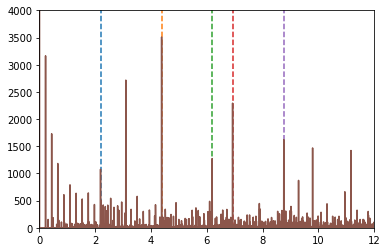

In [248]:
peak1=(2*np.pi/2.87)*np.sqrt(1**2+0**2+0**2) #(1,1,0)
peak2=(2*np.pi/2.87)*np.sqrt(2**2+0**2+0**2) #(2,0,0)
peak3=(2*np.pi/2.87)*np.sqrt(2**2+2**2+0**2) #(2,2,0)
peak4=(2*np.pi/2.87)*np.sqrt(3**2+1**2+0**2) #(3,1,0)
peak5=(2*np.pi/2.87)*np.sqrt(4**2+0**2+0**2) #(4,0,0)

peaks=[
       [peak1,peak1],
       [peak2,peak2],
       [peak3,peak3],
       [peak4,peak4],
       [peak5,peak5]
      ]
peak_2=[0,100000]

plt.ylim(0,4000)
plt.xlim(0,12)

plt.plot(peaks[0],peak_2,'--')
plt.plot(peaks[1],peak_2,'--')
plt.plot(peaks[2],peak_2,'--')
plt.plot(peaks[3],peak_2,'--')
plt.plot(peaks[4],peak_2,'--')

plt.plot(q[:],Sqqf[:])

### Fe FCC

In [383]:
a=read('./Fe-FCC/POSCAR')

alata=3.6456999779
alatc=3.6456999779

hkl=1
N=10
pos_grid=np.zeros((N+1,N+1,N+1))

rgrida=np.arange(0.0,alata+alata/N,alata/N)
rgridc=np.arange(0.0,alatc+alatc/N,alatc/N)

for i in range(a.positions.shape[0]):
    idx=np.absolute(rgrida-a.positions[i,0]).argmin()
    idy=np.absolute(rgrida-a.positions[i,1]).argmin()
    idz=np.absolute(rgridc-a.positions[i,2]).argmin()
    pos_grid[idx,idy,idz]+=1

In [384]:
pos_grid[0,0,:]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [385]:
#Fourier transform
#pos_grid=np.random.rand(N+1,N+1,N+1)
Sq_fft=fftn(pos_grid)
Sq_fft=np.absolute(Sq_fft)

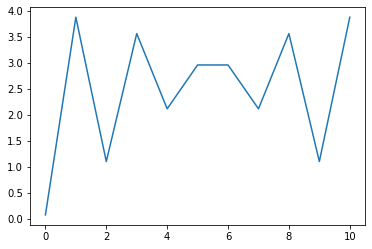

In [386]:
plt.plot(range(N+1),Sq_fft[10,10,:])

In [387]:
def sample_Sq(klist):
    print(alata,alatc,Sq_fft.shape)
    q=(2*np.pi/alatc)*np.arange(0.0,10.0,0.01)
    Sqq=np.zeros(q.shape[0])
    for i in tqdm(klist):
        for j in range(N*hkl-1):
            for k in range(N*hkl-1):
                r0=2*np.pi/alata*np.sqrt(i**2+j**2+k**2)
                r1=2*np.pi/alata*np.sqrt((i+1)**2+j**2+k**2)
                Sq=Sq_fft[i,j,k]/(4/3*np.pi*(r1**3-r0**3))
                Sqq[np.abs(q-r0).argmin()]+=Sq
    return Sqq

In [388]:
num_cores=mp.cpu_count()
print(num_cores)
pool=Pool(num_cores)
klist_tot=range(N*hkl-1)
chunks=[klist_tot[i::num_cores] for i in range(num_cores)]

Sqq=[]
for Sqq_join in pool.map(sample_Sq, chunks):
    Sqq+=[Sqq_join]
pool.close()

8
3.6456999779 3.6456999779 (11, 11, 11)
3.6456999779 3.6456999779 (11, 11, 11)
3.6456999779 3.6456999779 (11, 11, 11)
3.6456999779 3.6456999779 (11, 11, 11)
3.6456999779 3.6456999779 (11, 11, 11)
3.6456999779 3.6456999779 (11, 11, 11)
3.6456999779 3.6456999779 (11, 11, 11)
3.6456999779 3.6456999779 (11, 11, 11)


In [389]:
q=(2*np.pi/alatc)*np.arange(0.0,10.0,0.01)
Sqqf=np.zeros(q.shape[0])
for s in Sqq:
    Sqqf+=s

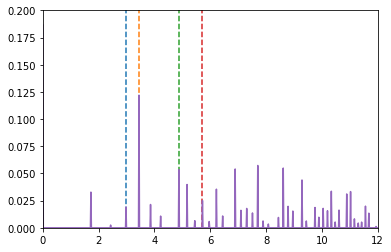

In [395]:
peak1=(2*np.pi/3.6456999779)*np.sqrt(1**2+1**2+1**2) #(2,0,0)
peak2=(2*np.pi/3.6456999779)*np.sqrt(2**2+0**2+0**2) #(2,2,0)
peak3=(2*np.pi/3.6456999779)*np.sqrt(2**2+2**2+0**2) #(4,0,0)
peak4=(2*np.pi/3.6456999779)*np.sqrt(3**2+1**2+1**2) #(4,2,0)

peaks=[
       [peak1,peak1],
       [peak2,peak2],
       [peak3,peak3],
       [peak4,peak4],
       [peak5,peak5]
      ]
peak_2=[0,100000]

plt.ylim(0,0.2)
plt.xlim(,12)

plt.plot(peaks[0],peak_2,'--')
plt.plot(peaks[1],peak_2,'--')
plt.plot(peaks[2],peak_2,'--')
plt.plot(peaks[3],peak_2,'--')
#plt.plot(peaks[4],peak_2,'--')

plt.plot(q[:],Sqqf[:])

### FCC w/o hidden atoms

In [54]:
a=read('./Fe-FCC/SPOSCAR.POSCAR.vasp')

alata=36.457
alatc=36.457

hkl=1
N=256
pos_grid=np.zeros((N+1,N+1,N+1))

rgrida=np.arange(0.0,alata+alata/N,alata/N)
rgridc=np.arange(0.0,alatc+alatc/N,alatc/N)

for i in range(a.positions.shape[0]):
    idx=np.absolute(rgrida-a.positions[i,0]).argmin()
    idy=np.absolute(rgrida-a.positions[i,1]).argmin()
    idz=np.absolute(rgridc-a.positions[i,2]).argmin()
    pos_grid[idx,idy,idz]+=1

In [57]:
#Fourier transform
#pos_grid=np.random.rand(N+1,N+1,N+1)
Sq_fft=fftn(pos_grid)
Sq_fft=np.absolute(Sq_fft)

In [58]:
def sample_Sq(klist):
    print(alata,alatc,Sq_fft.shape)
    q=(2*np.pi/alatc)*np.arange(0.0,80.0,0.05)
    Sqq=np.zeros(q.shape[0])
    for i in tqdm(klist):
        for j in range(N*hkl-1):
            for k in range(N*hkl-1):
                r0=2*np.pi/alata*np.sqrt(i**2+j**2+k**2)
                r1=2*np.pi/alata*np.sqrt((i+1)**2+j**2+k**2)
                Sq=Sq_fft[i,j,k]/(4/3*np.pi*(r1**3-r0**3))
                Sqq[np.abs(q-r0).argmin()]+=Sq
    return Sqq

In [59]:
num_cores=mp.cpu_count()
print(num_cores)
pool=Pool(num_cores)
klist_tot=range(N*hkl-1)
chunks=[klist_tot[i::num_cores] for i in range(num_cores)]

Sqq=[]
for Sqq_join in pool.map(sample_Sq, chunks):
    Sqq+=[Sqq_join]
pool.close()

8
36.457 36.457 (257, 257, 257)
36.457 36.457 (257, 257, 257)
36.457 36.457 (257, 257, 257)
36.457 36.457 (257, 257, 257)
36.457 36.457 (257, 257, 257)
36.457 36.457 (257, 257, 257)
36.457 36.457 (257, 257, 257)
36.457 36.457 (257, 257, 257)


In [60]:
q=(2*np.pi/alatc)*np.arange(0.0,80.0,0.05)
Sqqf=np.zeros(q.shape[0])
for s in Sqq:
    Sqqf+=s

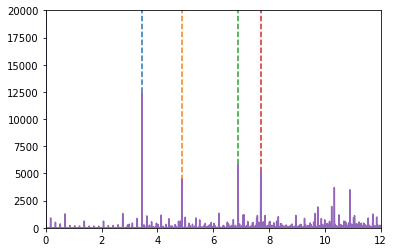

In [64]:
peak1=(2*np.pi/3.6456999779)*np.sqrt(2**2+0**2+0**2) #(2,0,0)
peak2=(2*np.pi/3.6456999779)*np.sqrt(2**2+2**2+0**2) #(2,2,0)
peak3=(2*np.pi/3.6456999779)*np.sqrt(4**2+0**2+0**2) #(4,0,0)
peak4=(2*np.pi/3.6456999779)*np.sqrt(4**2+2**2+0**2) #(4,2,0)

peaks=[
       [peak1,peak1],
       [peak2,peak2],
       [peak3,peak3],
       [peak4,peak4],
       [peak5,peak5]
      ]
peak_2=[0,100000]

plt.ylim(0,20000)
plt.xlim(0,12)

plt.plot(peaks[0],peak_2,'--')
plt.plot(peaks[1],peak_2,'--')
plt.plot(peaks[2],peak_2,'--')
plt.plot(peaks[3],peak_2,'--')
#plt.plot(peaks[4],peak_2,'--')

plt.plot(q[:],Sqqf[:])

In [ ]:
Sq_bcc=np.loadtxt('./sq.dat-bcc')
Sq_fcc=np.loadtxt('./sq.dat-fcc')

In [ ]:
peak1=(1*np.pi/2.87)*np.sqrt(1**2+1**2+0**2)
peak2=(2*np.pi/2.87)*np.sqrt(2**2+0**2+0**2)
peak3=(2*np.pi/2.87)*np.sqrt(3**2+1**2+0**2)
peak4=(2*np.pi/2.87)*np.sqrt(3**2+2**2+0**2)
peak5=(2*np.pi/2.87)*np.sqrt(4**2+0**2+0**2)

peaks=[
       [peak1,peak1],
       [peak2,peak2],
       [peak3,peak3],
       [peak4,peak4],
       [peak5,peak5]
      ]
peak_2=[0,100000]

plt.ylim(20,90)
plt.xlim((0),20)
plt.plot(Sq_bcc[:,0], Sq_bcc[:,1])
#plt.plot(Sq_fcc[:,0], Sq_fcc[:,1])

plt.plot(peaks[0],peak_2,'--')
plt.plot(peaks[1],peak_2,'--')
plt.plot(peaks[2],peak_2,'--')
plt.plot(peaks[3],peak_2,'--')
plt.plot(peaks[4],peak_2,'--')

In [ ]:
peak1=(2*np.pi/1)*np.sqrt(1**2 + 1**2 + 1**2)
peak2=(2*np.pi/1)*np.sqrt(2**2 + 2**2 + 0**2)

peaks=[
       [peak1,peak1],
       [peak2,peak2],
       [peak3,peak3],
       [peak4,peak4],
       [peak5,peak5]
      ]
peak_2=[0,100000]


plt.ylim(0,20)
plt.xlim((2*np.pi/1),20)
plt.plot(Sq_fcc[:,0], Sq_fcc[:,1])

plt.plot(peaks[0],peak_2,'--')


### I41/amd solid

In [198]:
a=read('./Deuterium/SPOSCAR.xyz')

alata=17.6
alatc=25.4461211476799996

hkl=1
N=256
pos_grid=np.zeros((N+1,N+1,N+1))

rgrida=np.arange(0.0,alata+alata/N,alata/N)
rgridc=np.arange(0.0,alatc+alatc/N,alatc/N)

for i in range(a.positions.shape[0]):
    idx=np.absolute(rgrida-a.positions[i,0]).argmin()
    idy=np.absolute(rgrida-a.positions[i,1]).argmin()
    idz=np.absolute(rgridc-a.positions[i,2]).argmin()
    pos_grid[idx,idy,idz]+=1

In [199]:
#Fourier transform
#pos_grid=np.random.rand(N+1,N+1,N+1)
Sq_fft=fftn(pos_grid)
Sq_fft=np.absolute(Sq_fft)

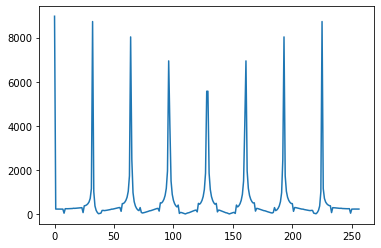

In [174]:
plt.plot(range(N+1),Sq_fft[0,0,:])

In [200]:
def sample_Sq(klist):
    print(alata,alatc,Sq_fft.shape)
    q=(2*np.pi/alatc)*np.arange(0.0,260.0,0.05)
    Sqq=np.zeros(q.shape[0])
    for i in tqdm(klist):
        for j in range(N*hkl-1):
            for k in range(N*hkl-1):
                r0=np.sqrt((2*np.pi/alata*i)**2+(2*np.pi/alata*j)**2+(2*np.pi/alatc*k)**2)
                r1=np.sqrt((2*np.pi/alata*i)**2+(2*np.pi/alata*j)**2+(2*np.pi/alatc*(k+1))**2)
                                
                Sq=Sq_fft[i,j,k]/(4/3*np.pi*(r1**3-r0**3))
                Sqq[np.abs(q-r0).argmin()]+=Sq
    return Sqq

In [201]:
num_cores=mp.cpu_count()
print(num_cores)
pool=Pool(num_cores)
klist_tot=range(N*hkl-1)
chunks=[klist_tot[i::num_cores] for i in range(num_cores)]

Sqq=[]
for Sqq_join in pool.map(sample_Sq, chunks):
    Sqq+=[Sqq_join]
pool.close()

8
17.6 25.44612114768 (257, 257, 257)
17.6 25.44612114768 (257, 257, 257)
17.6 25.44612114768 (257, 257, 257)
17.6 25.44612114768 (257, 257, 257)
17.6 25.44612114768 (257, 257, 257)
17.6 25.44612114768 (257, 257, 257)
17.6 25.44612114768 (257, 257, 257)
17.6 25.44612114768 (257, 257, 257)


In [202]:
q=(2*np.pi/alatc)*np.arange(0.0,260.0,0.05)
Sqqf=np.zeros(q.shape[0])
for s in Sqq:
    Sqqf+=s

In [203]:
Sqqf_classic=Sqqf

### supersolid phase

In [214]:
a=np.loadtxt("../Results/atoms-pimd-65.csv", delimiter=",")
#a=np.loadtxt("../Results/atoms-116.csv", delimiter=",")

In [215]:
a.shape[0]/128/128

65.0

In [216]:
alata=4.38
alatc=6.33

hkl=1
N=64
pos_grid=np.zeros((N+1,N+1,N+1))

rgrida=np.arange(0.0,alata+alata/N,alata/N)
rgridc=np.arange(0.0,alatc+alatc/N,alatc/N)

for i in trange(a.shape[0]):
    idx=np.absolute(rgrida-a[i,0]).argmin()
    idy=np.absolute(rgrida-a[i,1]).argmin()
    idz=np.absolute(rgridc-a[i,2]).argmin()
    pos_grid[idx,idy,idz]+=1/65/128

In [217]:
supercell=4
alata*=supercell
alatc*=supercell

pos_grid_sup=np.zeros((supercell*pos_grid.shape[0],supercell*pos_grid.shape[1],supercell*pos_grid.shape[2]))

for i in range(supercell):
    for j in range(supercell):
        for k in range(supercell):
            pos_grid_sup[i*pos_grid.shape[0]:(i+1)*pos_grid.shape[0],
                         j*pos_grid.shape[1]:(j+1)*pos_grid.shape[1],
                         k*pos_grid.shape[2]:(k+1)*pos_grid.shape[2]] = pos_grid

In [189]:
pos_grid_sup.shape

(260, 260, 260)

In [218]:
#Fourier transform
#pos_grid=np.random.rand(N+1,N+1,N+1)
Sq_fft=fftn(pos_grid_sup)
Sq_fft=np.absolute(Sq_fft)

In [219]:
def sample_Sq(klist):
    print(alata,alatc,Sq_fft.shape)
    q=(2*np.pi/alatc)*np.arange(0.0,260.0,0.05)
    Sqq=np.zeros(q.shape[0])
    for i in tqdm(klist):
        for j in range(N*supercell-1):
            for k in range(N*supercell-1):
                r0=np.sqrt((2*np.pi/alata*i)**2+(2*np.pi/alata*j)**2+(2*np.pi/alatc*k)**2)
                r1=np.sqrt((2*np.pi/alata*i)**2+(2*np.pi/alata*j)**2+(2*np.pi/alatc*(k+1))**2)
                                
                Sq=Sq_fft[i,j,k]/(4/3*np.pi*(r1**3-r0**3))
                Sqq[np.abs(q-r0).argmin()]+=Sq
    return Sqq

In [220]:
num_cores=mp.cpu_count()
print(num_cores)
pool=Pool(num_cores)
klist_tot=range(N*supercell-1)
chunks=[klist_tot[i::num_cores] for i in range(num_cores)]

Sqq=[]
for Sqq_join in pool.map(sample_Sq, chunks):
    Sqq+=[Sqq_join]
pool.close()

8
17.52 25.32 (260, 260, 260)
17.52 25.32 (260, 260, 260)
17.52 25.32 (260, 260, 260)
17.52 25.32 (260, 260, 260)
17.52 25.32 (260, 260, 260)
17.52 25.32 (260, 260, 260)
17.52 25.32 (260, 260, 260)
17.52 25.32 (260, 260, 260)


In [221]:
q=(2*np.pi/alatc)*np.arange(0.0,260.0,0.05)
Sqqf=np.zeros(q.shape[0])
for s in Sqq:
    Sqqf+=s

In [222]:
Sqqf_pimd=Sqqf

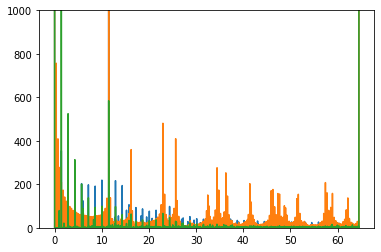

In [239]:
#plt.xlim(0.0,2)
plt.ylim(0,1000)
plt.plot(q[:],Sqqf_pimd[:]/2,'-')
plt.plot(q,Sqqf_classic/4)
plt.plot(q,2*Sqqf_super,'-')



### solid supercell

In [ ]:
a=read('./Deuterium/CPOSCAR.xyz')

alata=4.28
alatc=5.966

hkl=4
N=128
pos_grid=np.zeros((N+1,N+1,N+1))

rgrida=np.arange(0.0,alata+alata/N,alata/N)
rgridc=np.arange(0.0,alatc+alatc/N,alatc/N)

for i in range(a.positions.shape[0]):
    idx=np.absolute(rgrida-a.positions[i,0]).argmin()
    idy=np.absolute(rgrida-a.positions[i,1]).argmin()
    idz=np.absolute(rgridc-a.positions[i,2]).argmin()
    pos_grid[idx,idy,idz]+=1

In [ ]:
#Fourier transform
Sq_fft=fftn(pos_grid)
Sq_fft=np.absolute(Sq_fft/np.count_nonzero(pos_grid))
#q=(2*np.pi/alatc)*np.arange(0.0,hkl*2*np.pi/alatc*np.sqrt(3),0.001)

In [ ]:
plt.plot(range(N+1),Sq_fft[0,0,:])

wrapper function

In [ ]:
def sample_Sq(klist):
    print(alata,alatc,Sq_fft.shape)
    q=(2*np.pi/alatc)*np.arange(0.0,hkl*2*np.pi/alatc*np.sqrt(3),0.01)
    Sqq=np.zeros(q.shape[0])
    for i in tqdm(klist):
        for j in range(N*hkl-1):
            for k in range(N*hkl-1):
                r0=np.sqrt(2*np.pi/alata*((i)/N)**2 + 2*np.pi/alata*((j)/N)**2 + 2*np.pi/alatc*((k)/N)**2)
                r1_a=np.sqrt(2*np.pi/alata*((i+1)/N)**2 + 2*np.pi/alata*((j)/N)**2 + 2*np.pi/alatc*((k)/N)**2)
                r1_b=np.sqrt(2*np.pi/alata*((i)/N)**2 + 2*np.pi/alata*((j)/N)**2 + 2*np.pi/alatc*((k+1)/N)**2)
                r1=np.maximum(r1_a,r1_b)

                Sq=Sq_fft[int(i%Sq_fft.shape[0]),int(j%Sq_fft.shape[1]),int(k%Sq_fft.shape[2])]/(4/3*np.pi*(r1**3-r0**3))
                Sqq[np.abs(q-r0).argmin()]+=Sq
    return Sqq

In [ ]:
num_cores=mp.cpu_count()
pool=Pool(num_cores)
klist_tot=range(N*hkl-1)
chunks=[klist_tot[i::num_cores] for i in range(num_cores)]

#sample_Sq(chunks[1])

#Sqq = [pool.apply(sample_Sq, args=(row,Sq_fft)) for row in tqdm(chunks)]
#pool.close()

Sqq=[]
for Sqq_join in pool.map(sample_Sq, chunks):
    Sqq+=[Sqq_join]
pool.close()
#pool.join()

In [ ]:
q=(2*np.pi/alatc)*np.arange(0.0,hkl*2*np.pi/alatc*np.sqrt(3),0.01)
Sqqf=np.zeros(q.shape[0])
for s in Sqq:
    Sqqf+=s

In [ ]:
plt.xlim(-0.5,14)
plt.ylim(0,20000)
plt.plot(q[:],Sqqf[:],'p')

## Unitcell

In [ ]:
a=read('./Deuterium/POSCAR-unit.xyz')

alata=1.1
alatc=3.18076514346

hkl=1
N=32
pos_grid=np.zeros((N+1,N+1,N+1))

rgrida=np.arange(0.0,alata+alata/N,alata/N)
rgridc=np.arange(0.0,alatc+alatc/N,alatc/N)

for i in range(a.positions.shape[0]):
    idx=np.absolute(rgrida-a.positions[i,0]).argmin()
    idy=np.absolute(rgrida-a.positions[i,1]).argmin()
    idz=np.absolute(rgridc-a.positions[i,2]).argmin()
    pos_grid[idx,idy,idz]+=1

In [ ]:
#Fourier transform
Sq_fft=fftn(pos_grid)
Sq_fft=np.absolute(Sq_fft/np.count_nonzero(pos_grid))

This is too demanding and inefficient!

In [ ]:
plt.plot(range((N+1)),Sq_fft[:,0,0])

In [ ]:
q_u=(2*np.pi/alatc)*np.arange(0.0,hkl*2*np.pi/alatc*np.sqrt(3),0.001)
Sqq_u=np.zeros(q_u.shape[0])

for i in trange(N*hkl-1):
    for j in range(N*hkl-1):
        for k in range(N*hkl-1):
            r0=np.sqrt(2*np.pi/alata*((i)/N)**2 + 2*np.pi/alata*((j)/N)**2 + 2*np.pi/alatc*((k)/N)**2)
            r1_a=np.sqrt(2*np.pi/alata*((i+1)/N)**2 + 2*np.pi/alata*((j)/N)**2 + 2*np.pi/alatc*((k)/N)**2)
            r1_b=np.sqrt(2*np.pi/alata*((i)/N)**2 + 2*np.pi/alata*((j)/N)**2 + 2*np.pi/alatc*((k+1)/N)**2)
            r1=np.maximum(r1_a,r1_b)
            
            Sq=Sq_fft[int(i%Sq_fft.shape[0]),int(j%Sq_fft.shape[1]),int(k%Sq_fft.shape[2])]/(4/3*np.pi*(r1**3-r0**3))
            Sqq_u[np.abs(q_u-r0).argmin()]+=Sq

In [ ]:
Sqq_u.shape

In [ ]:
plt.ylim(0,300)
plt.xlim(0,15)
plt.plot(q_u[:],Sqq_u[:],'-')

### Plot: Solid vs. quantum solid phases

In [ ]:
sq_solid=np.loadtxt('./sq.dat')
sq_qsolid=np.loadtxt('./sq.dat-q')

In [ ]:
fig, axs = plt.subplots(1,2, sharex=True, sharey=True)
plt.subplots_adjust(wspace=.05)

axs[0].set_ylim(0.6,1.0)
axs[0].set_xlim(-0.5,8.0)

axs[0].set_yticks(np.arange(0.6, 1.01, .1))
axs[0].tick_params(axis="y", labelsize=12, direction='in')

axs[0].set_xticks(np.arange(0.0, 8.01, 2.0))
axs[0].tick_params(axis="x", labelsize=12, direction='in')

axs[0].set_xlabel('|q| ($\AA^{-1}$)', fontsize=16)
axs[0].set_ylabel('Structure factor S(q)', fontsize=16)

axs[0].plot(sq_solid[:,0], sq_solid[:,1]/300000, color='#00A0EB', label='$I4_1/amd$')
axs[0].legend()

axs[1].set_xlabel('|q| ($\AA^{-1}$)', fontsize=16)
axs[1].tick_params(axis="x", labelsize=12, direction='in')
axs[1].tick_params(axis="y", labelsize=12, direction='in')

axs[1].plot(sq_qsolid[:,0], sq_qsolid[:,1]*2, color='#F54169', label='Quantum solid')
axs[1].legend()

In [ ]:
p 'sq.dat-q' u 1:($2*2) w l , 'sq.dat' u 1:($2/300000) w l